<a href="https://colab.research.google.com/github/AhmedAboushanab/COVID-19/blob/master/Copy_of_Both_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

## Importing the libraries

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

## Importing the dataset

In [112]:
dataset = pd.read_csv('Meta-Analysis-POC - Data-4.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [114]:
print(X_train)

[[  6.26666667 100.        ]
 [  5.3         43.07      ]
 [  5.46666667  29.17      ]
 [  5.9        100.        ]
 [  4.96666667  32.5       ]
 [  5.33       100.        ]
 [  4.8         42.47      ]
 [  4.4         92.67      ]
 [  5.6        100.        ]
 [  5.43       100.        ]
 [  8.          22.37      ]
 [  5.5        100.        ]
 [  5.53       100.        ]
 [  5.43       100.        ]
 [  5.43       100.        ]
 [  5.73        94.57      ]
 [  5.5        100.        ]
 [  5.43       100.        ]
 [  5.5         22.73      ]
 [  5.83        98.3       ]
 [  8.17        99.47      ]
 [  6.66666667 100.        ]
 [  5.47       100.        ]
 [  3.76666667 100.        ]
 [  7.43        94.        ]
 [  5.53       100.        ]
 [  5.2         37.73      ]
 [  6.          95.13      ]
 [  5.53       100.        ]
 [  5.87       100.        ]
 [  4.73333333  94.33      ]
 [  6.07        99.3       ]
 [  5.5        100.        ]
 [  5.26666667  99.47      ]
 [  5.73      

In [115]:
print(y_train)

['Bad' 'Hit' 'Good' 'Bad' 'Good' 'Hit' 'Good' 'Hit' 'Hit' 'Hit' 'Bad'
 'Good' 'Hit' 'Hit' 'Hit' 'Good' 'Hit' 'Hit' 'Good' 'Good' 'Bad' 'Bad'
 'Hit' 'Bad' 'Bad' 'Hit' 'Hit' 'Bad' 'Hit' 'Good' 'Hit' 'Bad' 'Hit' 'Hit'
 'Hit' 'Bad' 'Hit' 'Bad' 'Good' 'Hit' 'Hit' 'Good' 'Hit' 'Bad' 'Hit' 'Hit'
 'Hit' 'Hit' 'Hit' 'Hit' 'Good' 'Bad' 'Hit' 'Good' 'Bad' 'Hit' 'Hit']


In [116]:
print(X_test)

[[  5.33       100.        ]
 [  4.93333333  29.67      ]
 [  5.56666667  17.67      ]
 [  5.9         15.07      ]
 [  5.13        94.4       ]
 [  5.53        98.27      ]
 [  5.2         43.53      ]
 [  6.3        100.        ]
 [  5.4        100.        ]
 [  5.4         31.        ]
 [  5.67       100.        ]
 [  4.9         94.8       ]
 [  5.6         97.7       ]
 [  5.33       100.        ]
 [  5.5        100.        ]
 [  5.5        100.        ]
 [  6.13        90.93      ]
 [  5.67       100.        ]
 [  7.7         99.63      ]
 [  5.4        100.        ]]


In [117]:
print(y_test)

['Hit' 'Bad' 'Bad' 'Bad' 'Good' 'Good' 'Hit' 'Bad' 'Hit' 'Bad' 'Hit' 'Hit'
 'Good' 'Hit' 'Hit' 'Hit' 'Bad' 'Hit' 'Bad' 'Hit']


**Feature Scaling**

In [118]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [119]:
#print(X_train)

In [120]:
#print(X_test)

**For loop for both Models**

In [121]:
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state = 0, max_iter=1000)))
models.append(('RF', RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.686667 (0.121289)
RF: 0.826667 (0.106249)


**boxplot algorithm comparison**

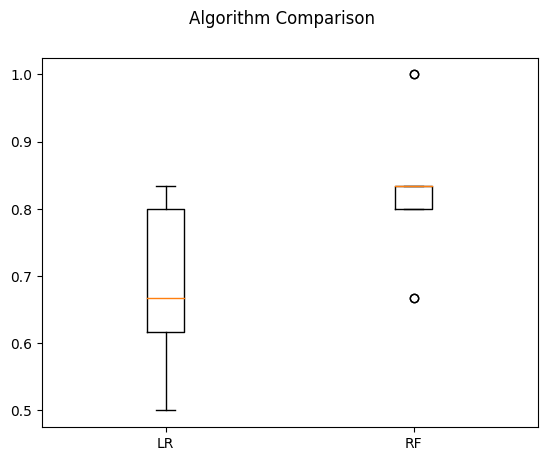

In [122]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()